In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
%matplotlib inline
from datetime import datetime 

In [5]:
prediction_data = pd.read_csv("cleaned_data/raw_training_dataset.csv")

In [6]:
from sklearn.model_selection import train_test_split
X = prediction_data.drop(['Outcome', 'Team_ID_L', 'Team_ID_H', 'Seed_H','Seed_L', 'Season'], axis=1)
X = X.fillna(0)
y = prediction_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=3)

In [8]:
## Build our dtree
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
dt_predictions = dtree.predict(X_test)
dt_predictions_proba = dtree.predict_proba(X_test)

In [10]:
from sklearn.metrics import log_loss, accuracy_score, classification_report

In [11]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       323
           1       0.77      0.67      0.72       353

    accuracy                           0.72       676
   macro avg       0.73      0.72      0.72       676
weighted avg       0.73      0.72      0.72       676



In [12]:
print(log_loss(y_test,dt_predictions_proba))

0.5275064958288036


In [13]:
dt_predictions_proba

array([[0.84183673, 0.15816327],
       [0.28378378, 0.71621622],
       [0.28378378, 0.71621622],
       ...,
       [0.84183673, 0.15816327],
       [0.69398907, 0.30601093],
       [0.97692308, 0.02307692]])

In [14]:
## Let's take a look at our tree and see what's coming up as predictive
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X.columns[:])
features

/Users/dz/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


['Unnamed: 0',
 'Last Seed_H',
 'Max Seed 5Y_H',
 'Avg Seed 5Y_H',
 'Avg Seed 5Y Weighted_H',
 'Last Seed_L',
 'Max Seed 5Y_L',
 'Avg Seed 5Y_L',
 'Avg Seed 5Y Weighted_L',
 'Unnamed: 0.1',
 'Seed_Matchup_Probability']

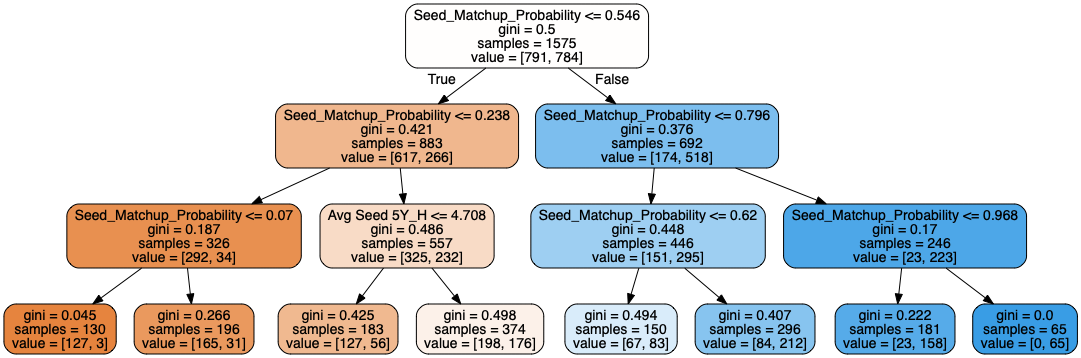

In [15]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
rfc_predictions = rfc.predict(X_test)
rfc_predictions_proba = rfc.predict_proba(X_test)

In [18]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       323
           1       0.77      0.72      0.75       353

    accuracy                           0.74       676
   macro avg       0.74      0.75      0.74       676
weighted avg       0.75      0.74      0.74       676



In [19]:
print(log_loss(y_test,rfc_predictions_proba))

0.5215933993532409
